In [412]:
from PIL import Image
import os

folder_path = 'male_eyes' 
male_image_list = []
male_label=[]

for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'): 
        male_image_list.append(os.path.join(folder_path, filename))
        male_label.append(0)

In [413]:
len(male_image_list)

6319

In [414]:
folder_path = 'female_eyes' 
female_image_list = []
female_label=[]

for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'): 
        female_image_list.append(os.path.join(folder_path, filename))
        female_label.append(1)

In [415]:
len(female_image_list)

5194

In [416]:
import pandas as pd
male_data={'image':male_image_list,'label':male_label}
female_data={'image':female_image_list,'label':female_label}

In [417]:
female_data

{'image': ['female_eyes\\1.jpg',
  'female_eyes\\10.jpg',
  'female_eyes\\100.jpg',
  'female_eyes\\1000.jpg',
  'female_eyes\\1001.jpg',
  'female_eyes\\1002.jpg',
  'female_eyes\\1005.jpg',
  'female_eyes\\1006.jpg',
  'female_eyes\\1007.jpg',
  'female_eyes\\1008.jpg',
  'female_eyes\\1009.jpg',
  'female_eyes\\101.jpg',
  'female_eyes\\1012.jpg',
  'female_eyes\\1013.jpg',
  'female_eyes\\1014.jpg',
  'female_eyes\\1015.jpg',
  'female_eyes\\1016.jpg',
  'female_eyes\\1017.jpg',
  'female_eyes\\1018.jpg',
  'female_eyes\\1019.jpg',
  'female_eyes\\102.jpg',
  'female_eyes\\1020.jpg',
  'female_eyes\\1021.jpg',
  'female_eyes\\1023.jpg',
  'female_eyes\\1025.jpg',
  'female_eyes\\1027.jpg',
  'female_eyes\\1029.jpg',
  'female_eyes\\103.jpg',
  'female_eyes\\1030.jpg',
  'female_eyes\\1031.jpg',
  'female_eyes\\1032.jpg',
  'female_eyes\\1035.jpg',
  'female_eyes\\1036.jpg',
  'female_eyes\\104.jpg',
  'female_eyes\\1040.jpg',
  'female_eyes\\1041.jpg',
  'female_eyes\\1043.jpg',
  

In [418]:
male_data

{'image': ['male_eyes\\0.jpg',
  'male_eyes\\1.jpg',
  'male_eyes\\10.jpg',
  'male_eyes\\100.jpg',
  'male_eyes\\1000.jpg',
  'male_eyes\\1002.jpg',
  'male_eyes\\1003.jpg',
  'male_eyes\\1004.jpg',
  'male_eyes\\1005.jpg',
  'male_eyes\\1008.jpg',
  'male_eyes\\1009.jpg',
  'male_eyes\\101.jpg',
  'male_eyes\\1010.jpg',
  'male_eyes\\1011.jpg',
  'male_eyes\\1012.jpg',
  'male_eyes\\1013.jpg',
  'male_eyes\\1014.jpg',
  'male_eyes\\1015.jpg',
  'male_eyes\\1016.jpg',
  'male_eyes\\1017.jpg',
  'male_eyes\\1018.jpg',
  'male_eyes\\1019.jpg',
  'male_eyes\\102.jpg',
  'male_eyes\\1020.jpg',
  'male_eyes\\1021.jpg',
  'male_eyes\\1022.jpg',
  'male_eyes\\1023.jpg',
  'male_eyes\\1024.jpg',
  'male_eyes\\1027.jpg',
  'male_eyes\\1028.jpg',
  'male_eyes\\1029.jpg',
  'male_eyes\\103.jpg',
  'male_eyes\\1030.jpg',
  'male_eyes\\1031.jpg',
  'male_eyes\\1032.jpg',
  'male_eyes\\1033.jpg',
  'male_eyes\\1034.jpg',
  'male_eyes\\1035.jpg',
  'male_eyes\\1036.jpg',
  'male_eyes\\1037.jpg',
  '

In [419]:
male_eye_data = pd.DataFrame(male_data)
female_eye_data = pd.DataFrame(female_data)

In [420]:
female_eye_data

,image,label
0,female_eyes\1.jpg,1
1,female_eyes\10.jpg,1
2,female_eyes\100.jpg,1
3,female_eyes\1000.jpg,1
4,female_eyes\1001.jpg,1
...,...,...
5189,female_eyes\990.jpg,1
5190,female_eyes\991.jpg,1
5191,female_eyes\996.jpg,1
5192,female_eyes\997.jpg,1


In [421]:
male_eye_data

,image,label
0,male_eyes\0.jpg,0
1,male_eyes\1.jpg,0
2,male_eyes\10.jpg,0
3,male_eyes\100.jpg,0
4,male_eyes\1000.jpg,0
...,...,...
6314,male_eyes\993.jpg,0
6315,male_eyes\995.jpg,0
6316,male_eyes\996.jpg,0
6317,male_eyes\997.jpg,0


In [422]:
eye_data = pd.concat([male_eye_data, female_eye_data], ignore_index=True)

In [423]:
eye_data

,image,label
0,male_eyes\0.jpg,0
1,male_eyes\1.jpg,0
2,male_eyes\10.jpg,0
3,male_eyes\100.jpg,0
4,male_eyes\1000.jpg,0
...,...,...
11508,female_eyes\990.jpg,1
11509,female_eyes\991.jpg,1
11510,female_eyes\996.jpg,1
11511,female_eyes\997.jpg,1


In [424]:
eye_data = eye_data.sample(frac=1).reset_index(drop=True)

In [425]:
eye_data

,image,label
0,female_eyes\2042.jpg,1
1,female_eyes\3009.jpg,1
2,female_eyes\912.jpg,1
3,male_eyes\822.jpg,0
4,male_eyes\157.jpg,0
...,...,...
11508,female_eyes\6368.jpg,1
11509,female_eyes\919.jpg,1
11510,female_eyes\5988.jpg,1
11511,male_eyes\4424.jpg,0


In [426]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow import keras
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from skimage.transform import resize
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
from PIL import Image
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import layers
! pip install visualkeras
import visualkeras
import os

import warnings
warnings.filterwarnings('ignore')

Defaulting to user installation because normal site-packages is not writeable


In [427]:
len(eye_data)

11513

In [428]:
eye_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11513 entries, 0 to 11512
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   11513 non-null  object
 1   label   11513 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 180.0+ KB


In [429]:
eye_data.describe()


,label
count,11513.000000
mean,0.451142
std,0.497629
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [430]:
eye_data.isna().sum()

image    0
label    0
dtype: int64

0    6319
1    5194
Name: label, dtype: int64


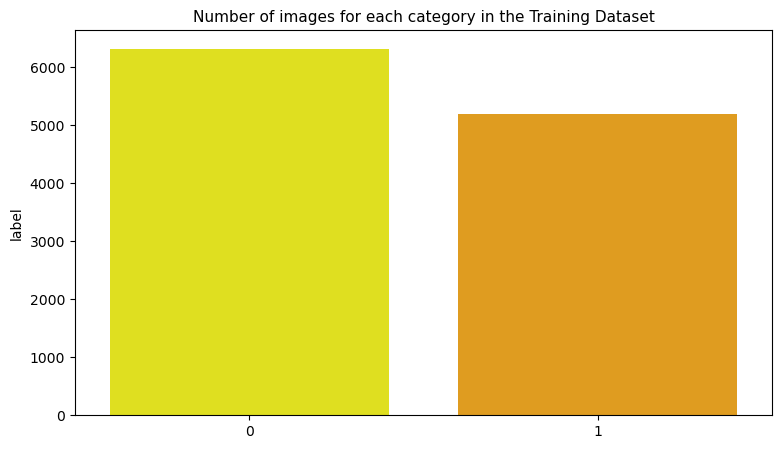

In [431]:
vc = eye_data['label'].value_counts()
print(vc)

plt.figure(figsize = (9, 5))
colors= ['#FFFF00', '#FFA500', '#FF00FF', '#EE82EE']
sns.barplot(x = vc.index, y = vc,palette=colors)
plt.title("Number of images for each category in the Training Dataset", fontsize = 11)
plt.show()

In [432]:
eye_data_major = eye_data[eye_data.label==0]
eye_data_minor = eye_data[eye_data.label==1]

eye_data_major_sample = resample(eye_data_major,
               replace=False, 
               n_samples=5194,
               random_state=42)
eye_data = pd.concat([eye_data_major_sample, eye_data_minor])
eye_data = shuffle(eye_data)
eye_data = eye_data.reset_index(drop=True)
print(eye_data.label.value_counts())

eye_data.describe()

0    5194
1    5194
Name: label, dtype: int64


,label
count,10388.000000
mean,0.500000
std,0.500024
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [433]:
size_list=set() 
for x in range(len(eye_data['image'])):
    size_list.add(plt.imread(eye_data["image"][x]).shape)

print(len(size_list))
print('Smallest size :', list(sorted(size_list))[0])
print('Largest size :', list(sorted(size_list))[-1])

65
Smallest size : (41, 41, 3)
Largest size : (117, 117, 3)


In [434]:
size = (64,64)
eye_data1 = eye_data.copy()

size_list = set()
for i in range(len(eye_data)):
    image=cv2.imread(eye_data['image'][i])
    image=cv2.resize(image,size)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    size_list.add(image.shape)
    eye_data1['image'][i] = image.flatten()

In [435]:
size_list

{(64, 64, 3)}

In [436]:
def cleaned(X):
    for i in range(len(X)):
        X[i] = np.vstack(X[i].reset_index(drop=True))
    return X

In [437]:
X_train_knn, X_test_knn,y_train_knn, y_test_knn = train_test_split(eye_data1.image, eye_data1.label, test_size = 0.1, random_state = 7)

X_train_knn, X_test_knn,y_train_knn, y_test_knn = cleaned([X_train_knn, X_test_knn,y_train_knn, y_test_knn])

print(X_train_knn.shape, X_test_knn.shape)
print(y_train_knn.shape, y_test_knn.shape)

(9349, 12288) (1039, 12288)
(9349, 1) (1039, 1)


In [438]:
error_rate = []
acc = []
for i in range(1,5):
 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train1,y_train1)
    pred_i = knn.predict(X_test1)
    error_rate.append(np.mean(pred_i != y_test1))

Text(0, 0.5, 'Error Rate')

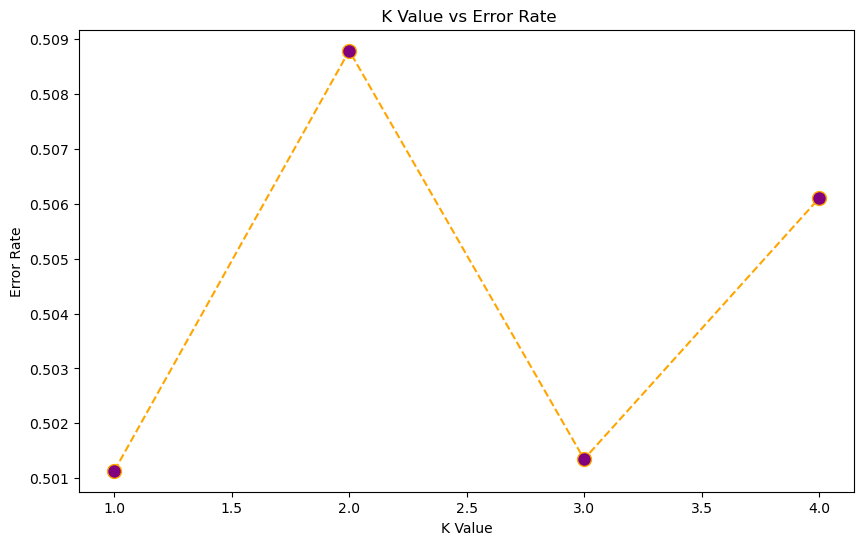

In [439]:
plt.figure(figsize=(10,6))
plt.plot(range(1,5),error_rate,color='orange', linestyle='dashed', marker='o', markerfacecolor='purple', markersize=10)
plt.title(' K Value vs Error Rate')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

In [440]:
KNN = KNeighborsClassifier(n_neighbors=20)
KNN.fit(X_train_knn,y_train_knn)
knn_pred = KNN.predict(X_test_knn)

In [441]:
%time
print('KNN Accuracy: %.3f' % accuracy_score(y_test1,knn_pred))

Wall time: 0 ns
KNN Accuracy: 0.803


Text(0.5, 1.0, 'Accuracy Score: 0.8026948989412896')

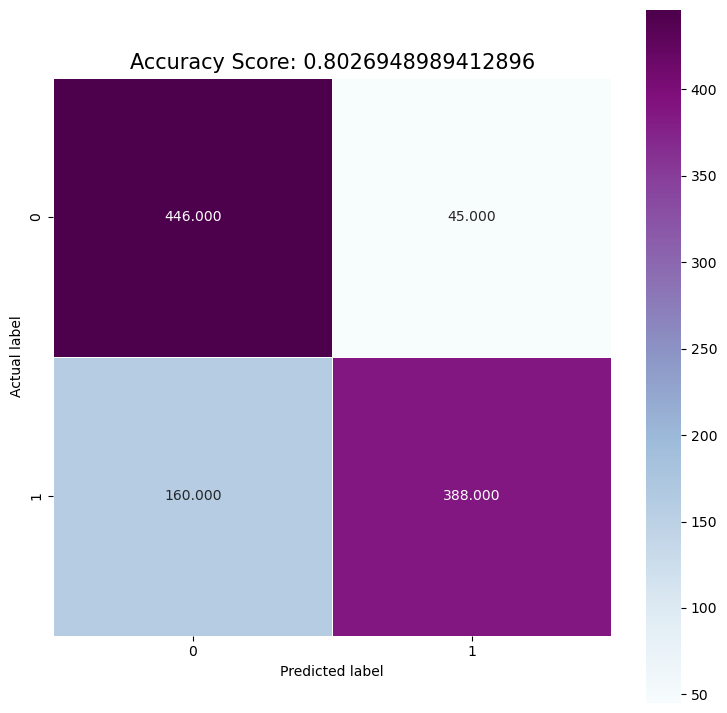

In [442]:
knn_cm = confusion_matrix(y_test_knn,knn_pred)
plt.figure(figsize=(9,9))
sns.heatmap(knn_cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap="BuPu")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test_knn,knn_pred))
plt.title(all_sample_title,size=15)

In [443]:
KNN_Classification_Report = classification_report(y_test1,knn_pred)
print(KNN_Classification_Report)

              precision    recall  f1-score   support

           0       0.74      0.91      0.81       491
           1       0.90      0.71      0.79       548

    accuracy                           0.80      1039
   macro avg       0.82      0.81      0.80      1039
weighted avg       0.82      0.80      0.80      1039



MLP

In [444]:
X_train2, X_val2, y_train2, y_val2 = train_test_split(eye_data1.image, eye_data1.label, test_size = 0.4, random_state = 7)
X_val2, X_test2,y_val2, y_test2 = train_test_split(X_val2, y_val2, test_size = 0.5, random_state = 7)

x_train2, x_val2, x_test2, y_train2, y_val2, y_test2 = cleaned([X_train2, X_val2, X_test2, y_train2, y_val2, y_test2])

print("X_Train: ", x_train2.shape) 
print("X_Val: ", x_val2.shape) 
print("X_Test: ", x_test2.shape) 
print("y_Train: ", y_train2.shape) 
print("y_Val: ", y_val2.shape) 
print("y_test: ", y_test2.shape) 


X_Train:  (6232, 12288)
X_Val:  (2078, 12288)
X_Test:  (2078, 12288)
y_Train:  (6232, 1)
y_Val:  (2078, 1)
y_test:  (2078, 1)


Model Architechture

In [445]:
# Model architechture
MLP = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1024, activation=tf.nn.leaky_relu), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation=tf.nn.leaky_relu), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024, activation=tf.nn.leaky_relu), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation=tf.nn.leaky_relu), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024, activation=tf.nn.leaky_relu), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation=tf.nn.leaky_relu), 
    tf.keras.layers.Dense(1024, activation=tf.nn.leaky_relu), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation=tf.nn.leaky_relu), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024, activation=tf.nn.leaky_relu), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation=tf.nn.leaky_relu), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024, activation=tf.nn.leaky_relu), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation=tf.nn.leaky_relu), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation=tf.nn.leaky_relu), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

In [446]:
male = len(y_train2[y_train2>0])
female = len(y_train2) - male
total = len(y_train2)
weight_for_male = total / (2 * male) 
weight_for_female = total / (2 * female)
class_weight = {0: weight_for_female, 1: weight_for_male}
print(class_weight)

adam_optimizer = tf.keras.optimizers.Adam()

{0: 0.9792583280955374, 1: 1.021639344262295}


In [447]:
MLP.compile(
    optimizer=adam_optimizer,
    loss='binary_crossentropy',
    metrics=[
      tf.keras.metrics.TruePositives(name='True Possitive'),
      tf.keras.metrics.FalsePositives(name='False Possitive'),
      tf.keras.metrics.TrueNegatives(name='True Negtive'),
      tf.keras.metrics.FalseNegatives(name='False Negative'), 
      tf.keras.metrics.BinaryAccuracy(name='Accuracy'),
      tf.keras.metrics.Precision(name='Precision'),
      tf.keras.metrics.Recall(name='Recall'),
      tf.keras.metrics.AUC(name='AUC'),
    ]
)

In [448]:
from keras.callbacks import ModelCheckpoint
save_best_callback = ModelCheckpoint('best_model.h5', 
                                      monitor='validation_loss', 
                                      save_best_only=True)

early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train2)
mlp_history = MLP.fit(x_train_scaled, 
          y_train2,
          class_weight=class_weight,
          batch_size=64,
          validation_data=(x_val2,y_val2),
          callbacks=[save_best_callback,early_stop,reduce_lr],
          epochs=100)

Epoch 1/100
98/98 [==============================] - 38s 350ms/step - loss: 2.2980 - True Possitive: 1498.0000 - False Possitive: 1629.0000 - True Negtive: 1553.0000 - False Negative: 1552.0000 - Accuracy: 0.4896 - Precision: 0.4791 - Recall: 0.4911 - AUC: 0.4854 - val_loss: 3.4371 - val_True Possitive: 0.0000e+00 - val_False Possitive: 0.0000e+00 - val_True Negtive: 1026.0000 - val_False Negative: 1052.0000 - val_Accuracy: 0.4937 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.4700 - lr: 0.0010
Epoch 2/100
98/98 [==============================] - 34s 345ms/step - loss: 0.9720 - True Possitive: 1448.0000 - False Possitive: 1583.0000 - True Negtive: 1599.0000 - False Negative: 1602.0000 - Accuracy: 0.4889 - Precision: 0.4777 - Recall: 0.4748 - AUC: 0.4896 - val_loss: 3.0041 - val_True Possitive: 1052.0000 - val_False Possitive: 1026.0000 - val_True Negtive: 0.0000e+00 - val_False Negative: 0.0000e+00 - val_Accuracy: 0.5063 - val_Precision: 0.5063 - val_Recall: 1.0000 -

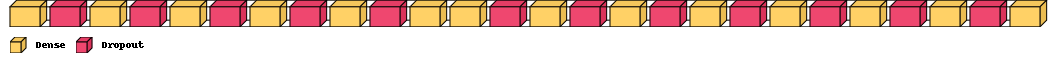

In [449]:
visualkeras.layered_view(MLP, scale_xy=50, scale_z=30, max_z=30, legend = True, spacing = 10)

In [450]:
x_test_scaled = scaler.fit_transform(x_test2)
score = MLP.evaluate(x_test_scaled, y_test2, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6450411677360535
Test accuracy: 870.0


In [451]:
y_pred2 = MLP.predict(x_test_scaled)
y_pred2 = np.where(y_pred2 > 0.5, 1, 0)
y_pred2

65/65 [==============================] - 4s 62ms/step


array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

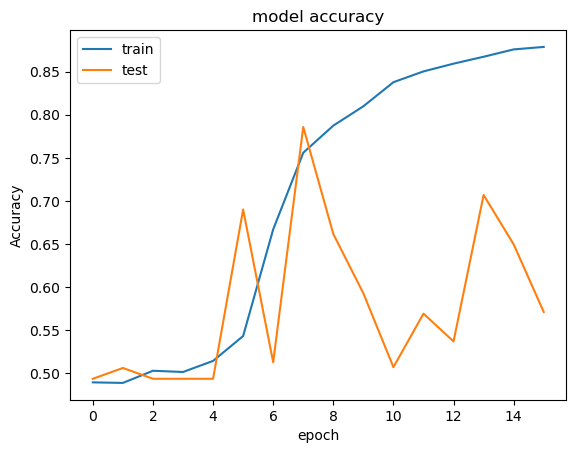

In [452]:
plt.plot(mlp_history.history['Accuracy'])
plt.plot(mlp_history.history['val_Accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.title('model accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

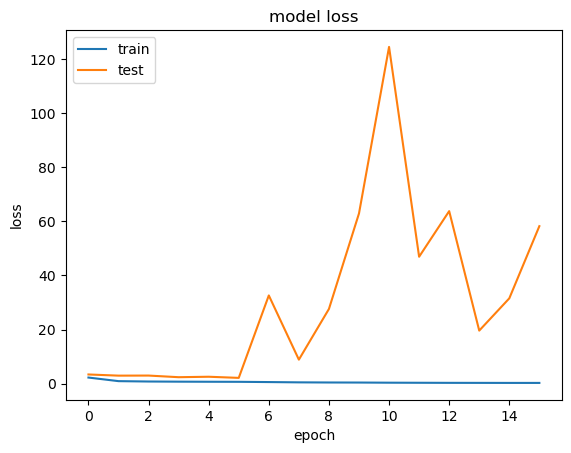

In [453]:
plt.plot(mlp_history.history['loss'])
plt.plot(mlp_history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('model loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [454]:
MLP_Classification_Report = classification_report(y_test2,y_pred2)
print(MLP_Classification_Report)

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       986
           1       0.72      0.80      0.75      1092

    accuracy                           0.73      2078
   macro avg       0.73      0.72      0.72      2078
weighted avg       0.73      0.73      0.73      2078



CNN

In [455]:
# Helper function
def to_tensor(_list):
    LIST = []
    for i in range(len(_list)):
        LIST.append(tf.convert_to_tensor(_list[i]))
    return LIST
def cleaned2(X):
    for i in range(len(X)):
        X[i] = np.stack(X[i].reset_index(drop=True))
    return X

In [456]:
size = (64,64)
eye_data2 = eye_data.copy()

for i in range(len(eye_data)):
    image=cv2.imread(eye_data['image'][i])
    image=cv2.resize(image,size)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    eye_data2['image'][i] = image

LE = LabelEncoder()

eye_data2['label'] = np.asarray(LE.fit_transform(eye_data2["label"]))

display(eye_data2.head())

,image,label
0,"[[[128, 114, 111], [133, 119, 116], [133, 120,...",0
1,"[[[178, 145, 126], [171, 138, 119], [174, 139,...",1
2,"[[[229, 188, 182], [231, 191, 185], [234, 193,...",1
3,"[[[231, 231, 231], [234, 234, 234], [236, 236,...",0
4,"[[[245, 193, 154], [242, 190, 151], [242, 188,...",1


In [457]:
eye_data2.image[1].shape

(64, 64, 3)

In [459]:
x_train_cnn, x_val_cnn, y_train_cnn, y_val_cnn = train_test_split(eye_data2.image, eye_data2.label, test_size = 0.1, random_state = 7)
x_val_cnn, x_test_cnn, y_val_cnn, y_test_cnn = train_test_split(x_val_cnn, y_val_cnn, test_size = 0.1, random_state = 7)

x_train_cnn, x_val_cnn, x_test_cnn, y_train_cnn, y_val_cnn, y_test_cnn = cleaned2([x_train_cnn, x_val_cnn, x_test_cnn, y_train_cnn, y_val_cnn, y_test_cnn])
x_train_cnn, x_val_cnn, x_test_cnn, y_train_cnn, y_val_cnn, y_test_cnn = to_tensor([x_train_cnn, x_val_cnn, x_test_cnn, y_train_cnn, y_val_cnn, y_test_cnn])

print("X Train: ", x_train_cnn.shape) 
print("X Val: ", x_val_cnn.shape) 
print("X Test: ", x_test_cnn.shape) 
print("y Train: ", y_train_cnn.shape) 
print("y Val: ", y_val_cnn.shape) 
print("y test: ", y_test_cnn.shape) 

X Train:  (9349, 64, 64, 3)
X Val:  (935, 64, 64, 3)
X Test:  (104, 64, 64, 3)
y Train:  (9349,)
y Val:  (935,)
y test:  (104,)


Model Architechture

In [460]:
CNN=keras.models.Sequential([
    keras.layers.Conv2D(filters=256, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(64,64,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=128, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=128, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=128, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')  
])

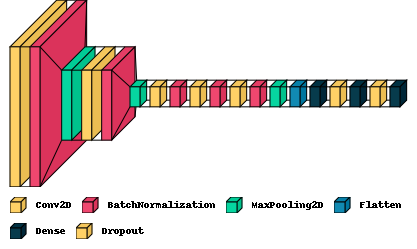

In [461]:
print()
visualkeras.layered_view(CNN, scale_xy=10, scale_z=10, max_z=10, legend = True, spacing = 10)

In [462]:
CNN.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [463]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)

cnn_history=CNN.fit(x_train_cnn, y_train_cnn, validation_data=(x_val_cnn, y_val_cnn),
            epochs=100,
            callbacks=[early_stop,reduce_lr]
           )

Epoch 1/100
293/293 [==============================] - 102s 344ms/step - loss: 0.5211 - accuracy: 0.7485 - val_loss: 0.6227 - val_accuracy: 0.7134 - lr: 0.0010
Epoch 2/100
293/293 [==============================] - 103s 352ms/step - loss: 0.3389 - accuracy: 0.8576 - val_loss: 0.6886 - val_accuracy: 0.7594 - lr: 0.0010
Epoch 3/100
293/293 [==============================] - 106s 362ms/step - loss: 0.2970 - accuracy: 0.8802 - val_loss: 0.5899 - val_accuracy: 0.7155 - lr: 0.0010
Epoch 4/100
293/293 [==============================] - 113s 385ms/step - loss: 0.2600 - accuracy: 0.8969 - val_loss: 0.2484 - val_accuracy: 0.8941 - lr: 0.0010
Epoch 5/100
293/293 [==============================] - 107s 367ms/step - loss: 0.2417 - accuracy: 0.9037 - val_loss: 0.3591 - val_accuracy: 0.8374 - lr: 0.0010
Epoch 6/100
293/293 [==============================] - 104s 355ms/step - loss: 0.2157 - accuracy: 0.9173 - val_loss: 0.2319 - val_accuracy: 0.9048 - lr: 0.0010
Epoch 7/100
293/293 [===================

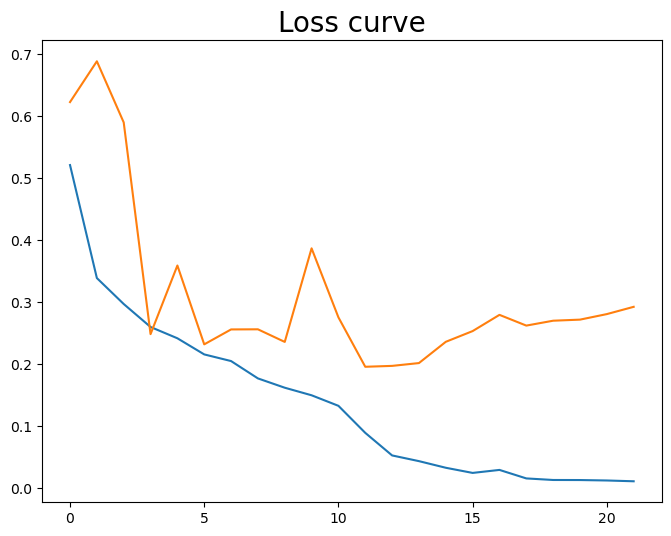

In [464]:
plt.figure(figsize=(8,6))
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('Loss curve',fontdict={'size':20})
plt.show()

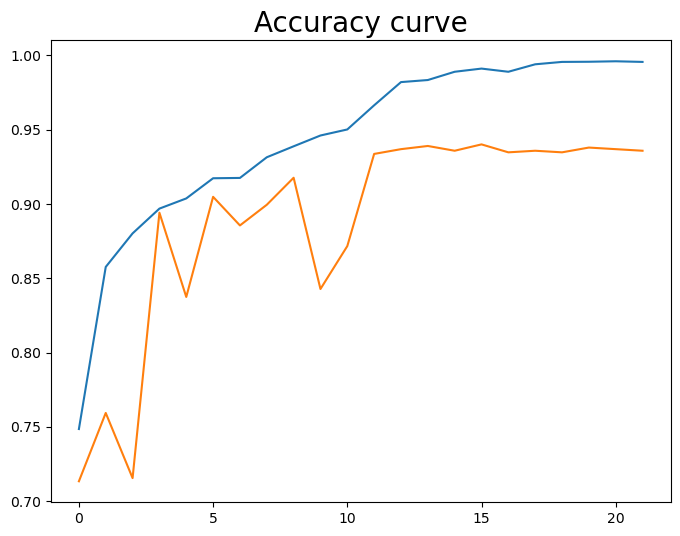

In [465]:
plt.figure(figsize=(8,6))
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('Accuracy curve',fontdict={'size':20})
plt.show()

In [466]:
y_pred_CNN = CNN.predict(x_test_cnn)
y_pred_CNN = np.round(y_pred_CNN)

recall_CNN = recall_score(y_test_cnn, y_pred_CNN)
precision_CNN = precision_score(y_test_cnn, y_pred_CNN)
f1_CNN = f1_score(y_test_cnn, y_pred_CNN)
roc_CNN = roc_auc_score(y_test_cnn, y_pred_CNN)

4/4 [==============================] - 0s 57ms/step


In [467]:
CNN_Classification_Report = classification_report(y_test_cnn, y_pred_CNN)
print(CNN_Classification_Report)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        52
           1       0.94      0.96      0.95        52

    accuracy                           0.95       104
   macro avg       0.95      0.95      0.95       104
weighted avg       0.95      0.95      0.95       104



Early stopper will identify optimal output and stop running rest of epochs. Reduce LR to control learning rate.save_best_callback to mark the best call back.

For KNN, precission- 0.82, recall-0.81, f1-score- 0.80 
For MLP,precission- 0.73 ,recall-  0.73,f1-score- 0.73 
For CNN,precission- 0.95   ,recall-   0.95 ,f1-score-     0.95 
According to the results CNN looks better.However, it will be highly depend on several factors such as EDA, test,train split, and number of layers and type of layers.